In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('results.csv')
df.head()

,Sampling Type,Coreset Size,Average Cost,Reduction in Data Size,Error,Avg Rand Index,Data,Optimal Cost,Avg Time,Num Iterations Volume Sampling,Clustering Algorithm
0,Volume Sampling,474,1.150492e+11,95.26,463.848772,0.963519,KDD,2.040426e+10,0.211612,1.0,KMeans++
1,Volume Sampling,475,1.326848e+11,95.25,550.279722,0.966513,KDD,2.040426e+10,0.221085,2.0,KMeans++
2,Volume Sampling,478,1.755777e+11,95.22,760.495267,0.953055,KDD,2.040426e+10,0.255715,5.0,KMeans++
3,Volume Sampling,926,5.792439e+10,90.74,183.883834,0.972418,KDD,2.040426e+10,0.265303,1.0,KMeans++
4,Volume Sampling,906,8.645982e+10,90.94,323.734209,0.966581,KDD,2.040426e+10,0.298187,2.0,KMeans++


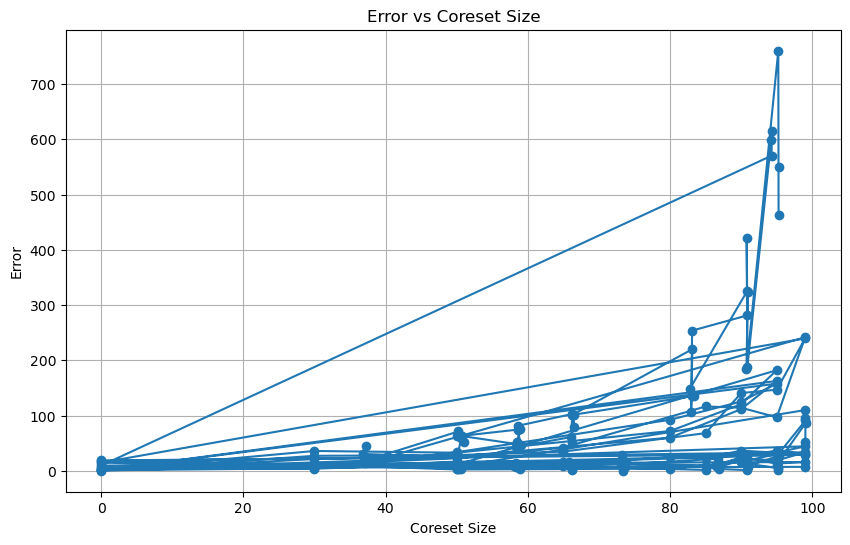

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df[df['Data'] == 'KDD']['Reduction in Data Size'], df[df['Data'] == 'KDD']['Error'], marker='o')
plt.xlabel('Coreset Size')
plt.ylabel('Error')
plt.title('Error vs Coreset Size')
plt.grid()
plt.show()

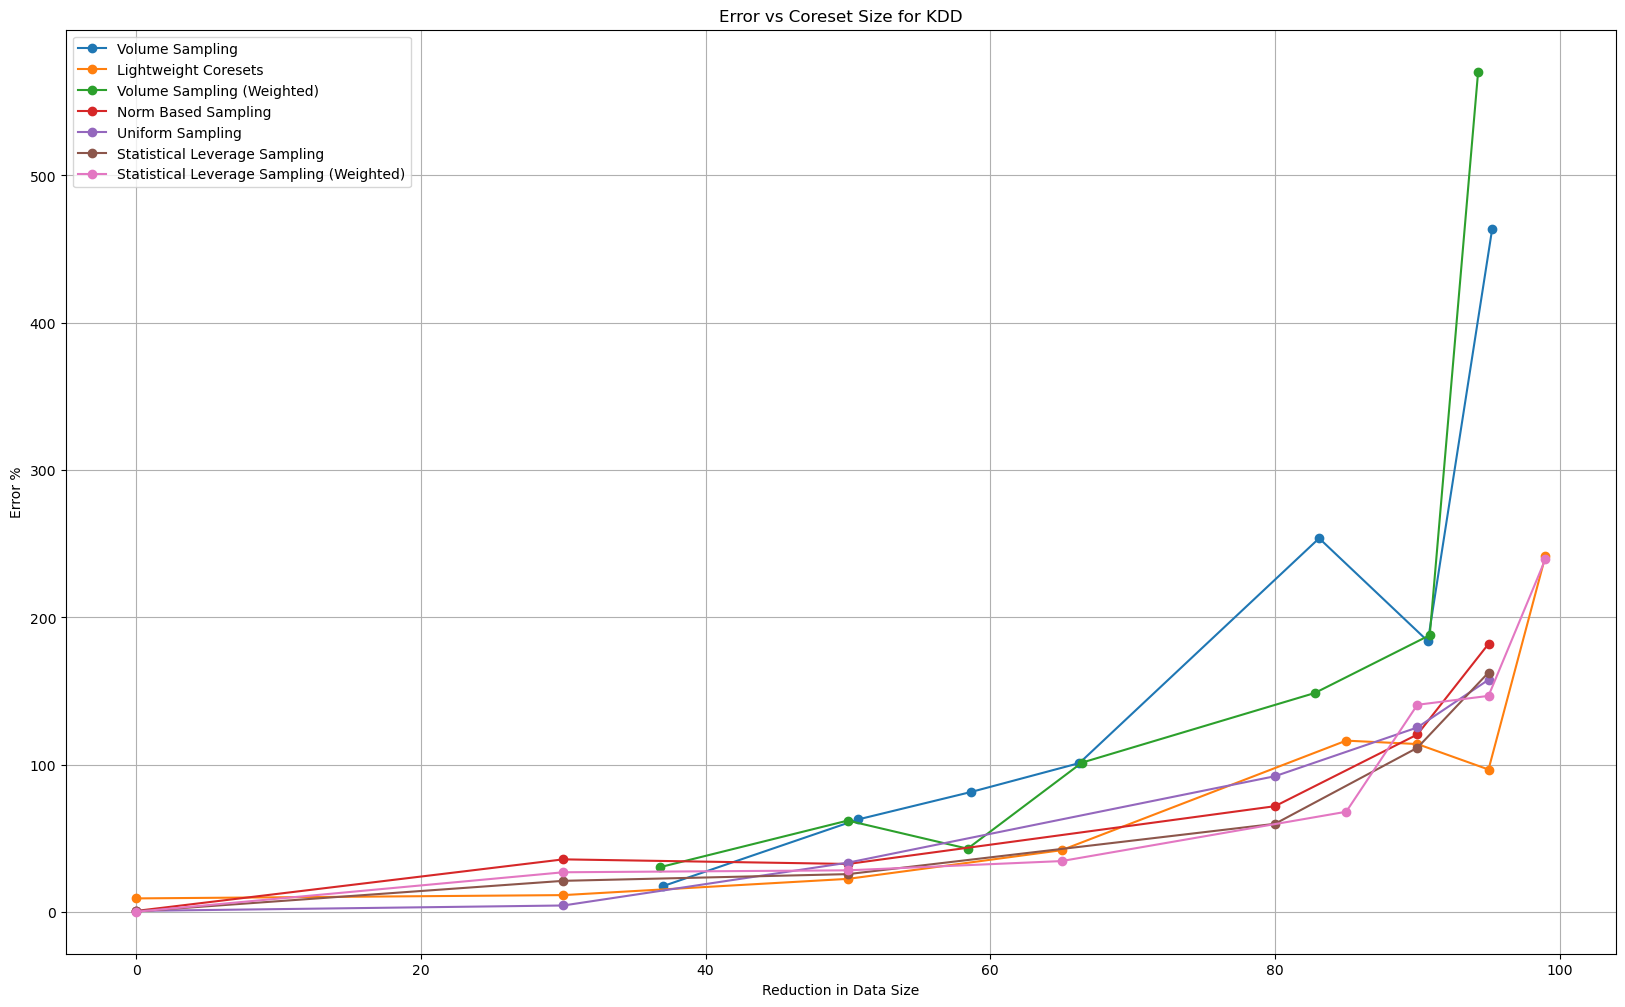

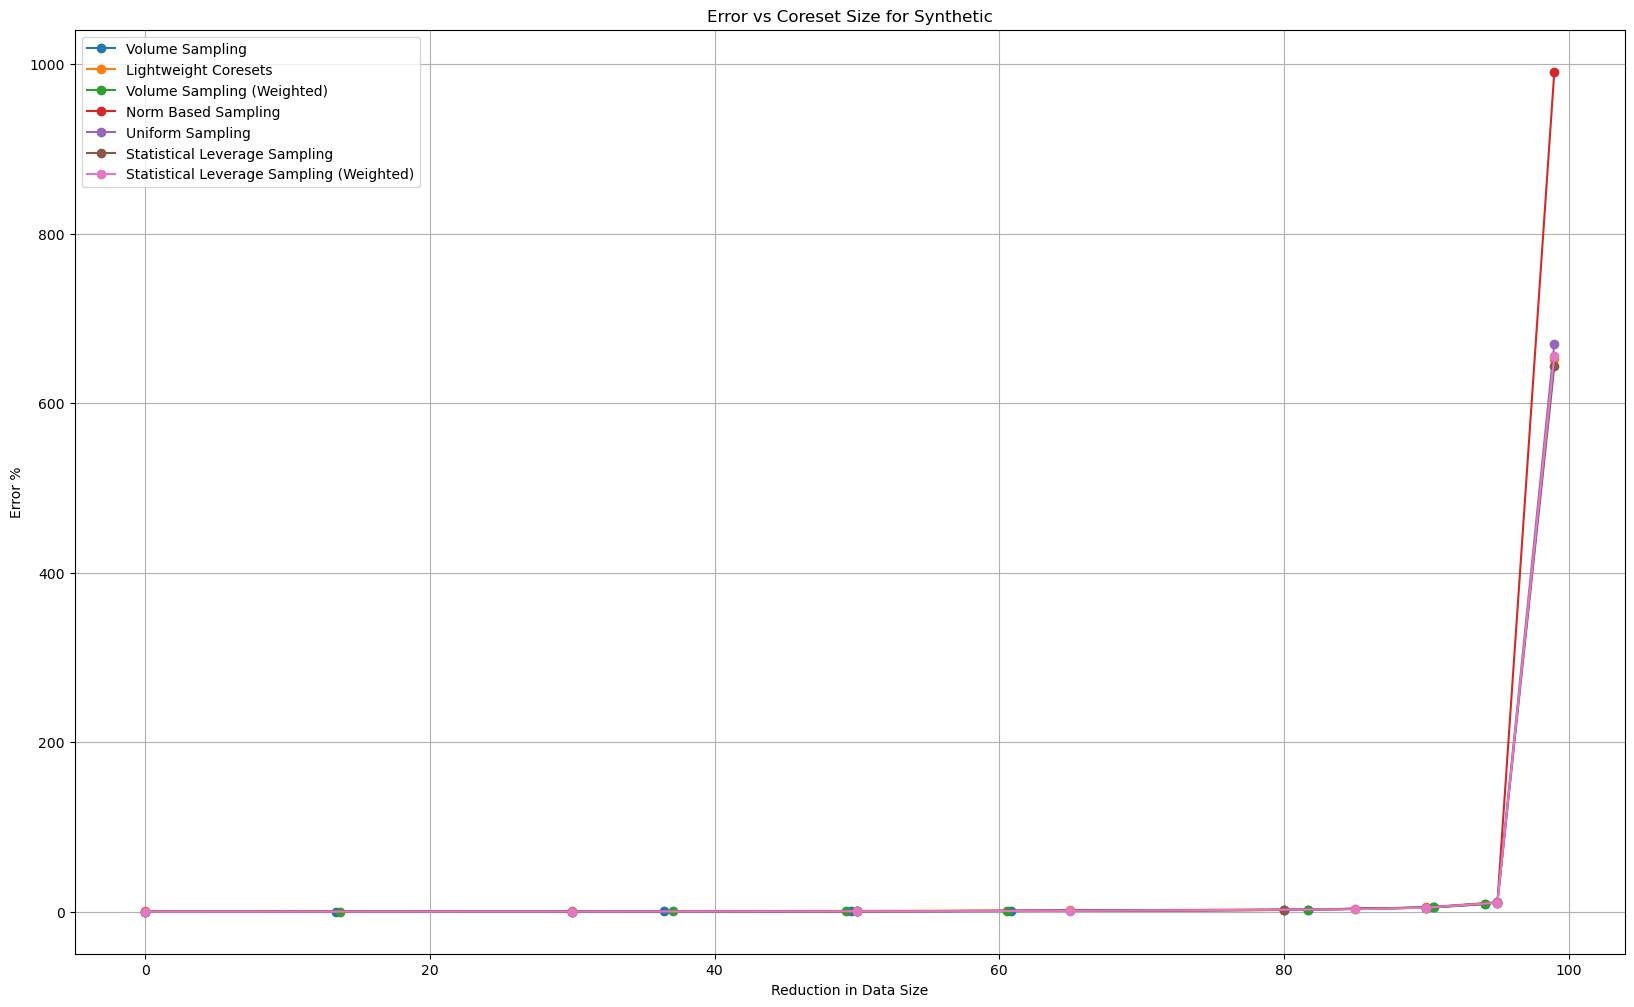

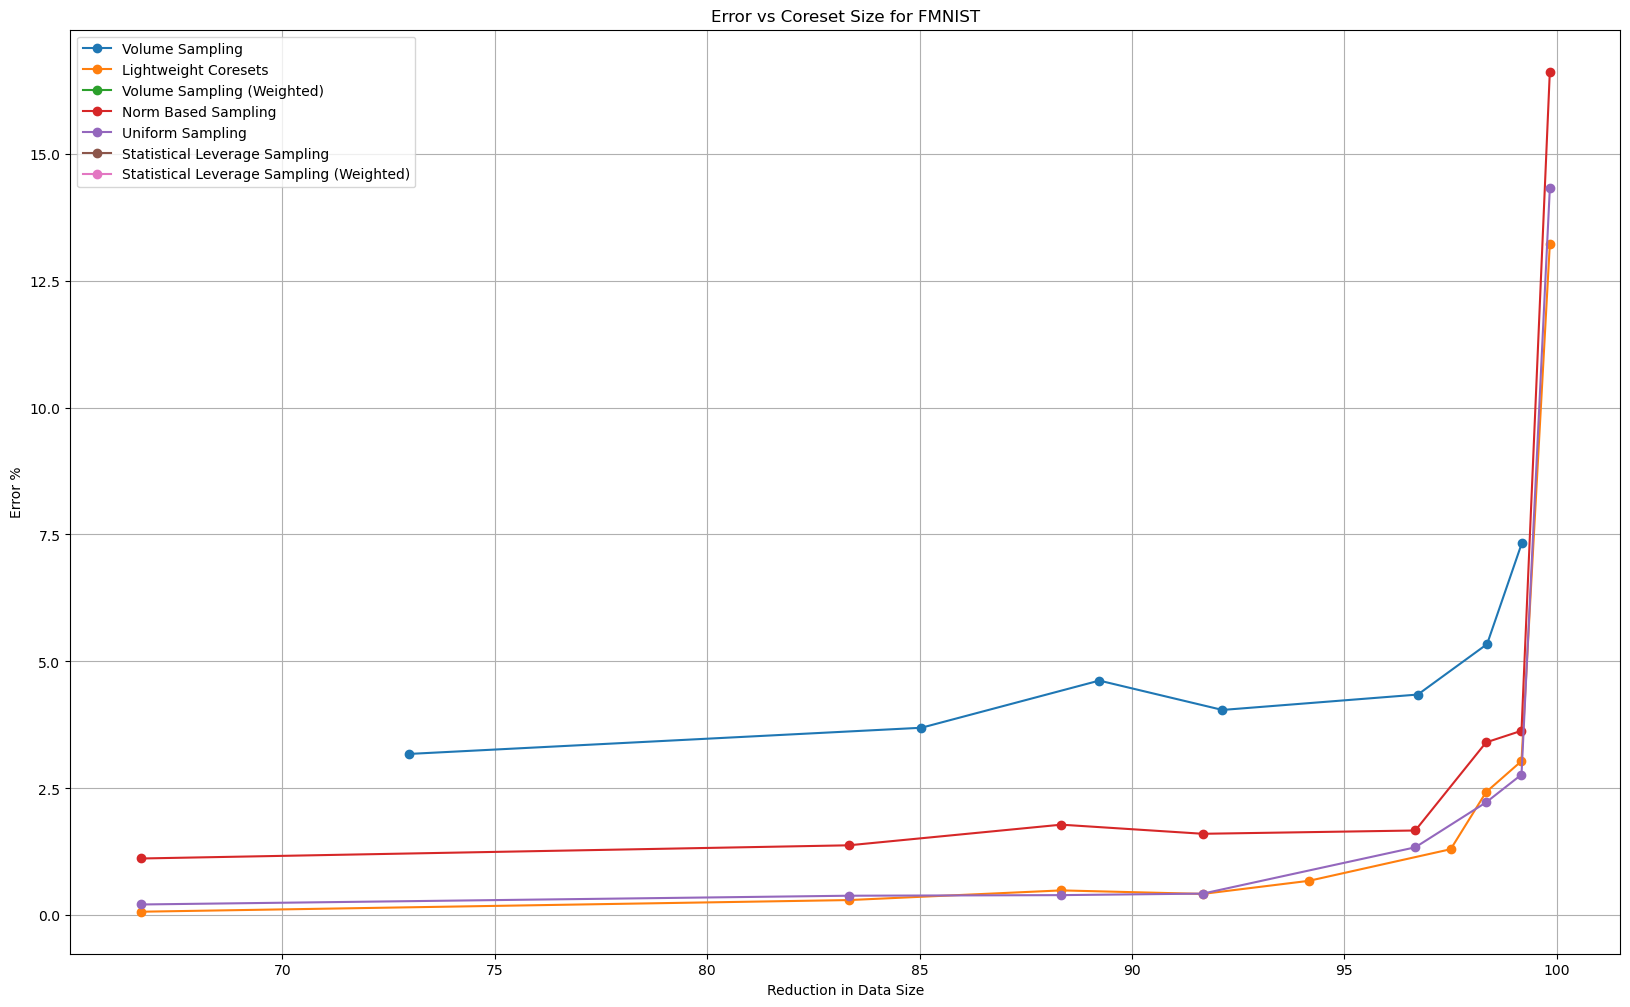

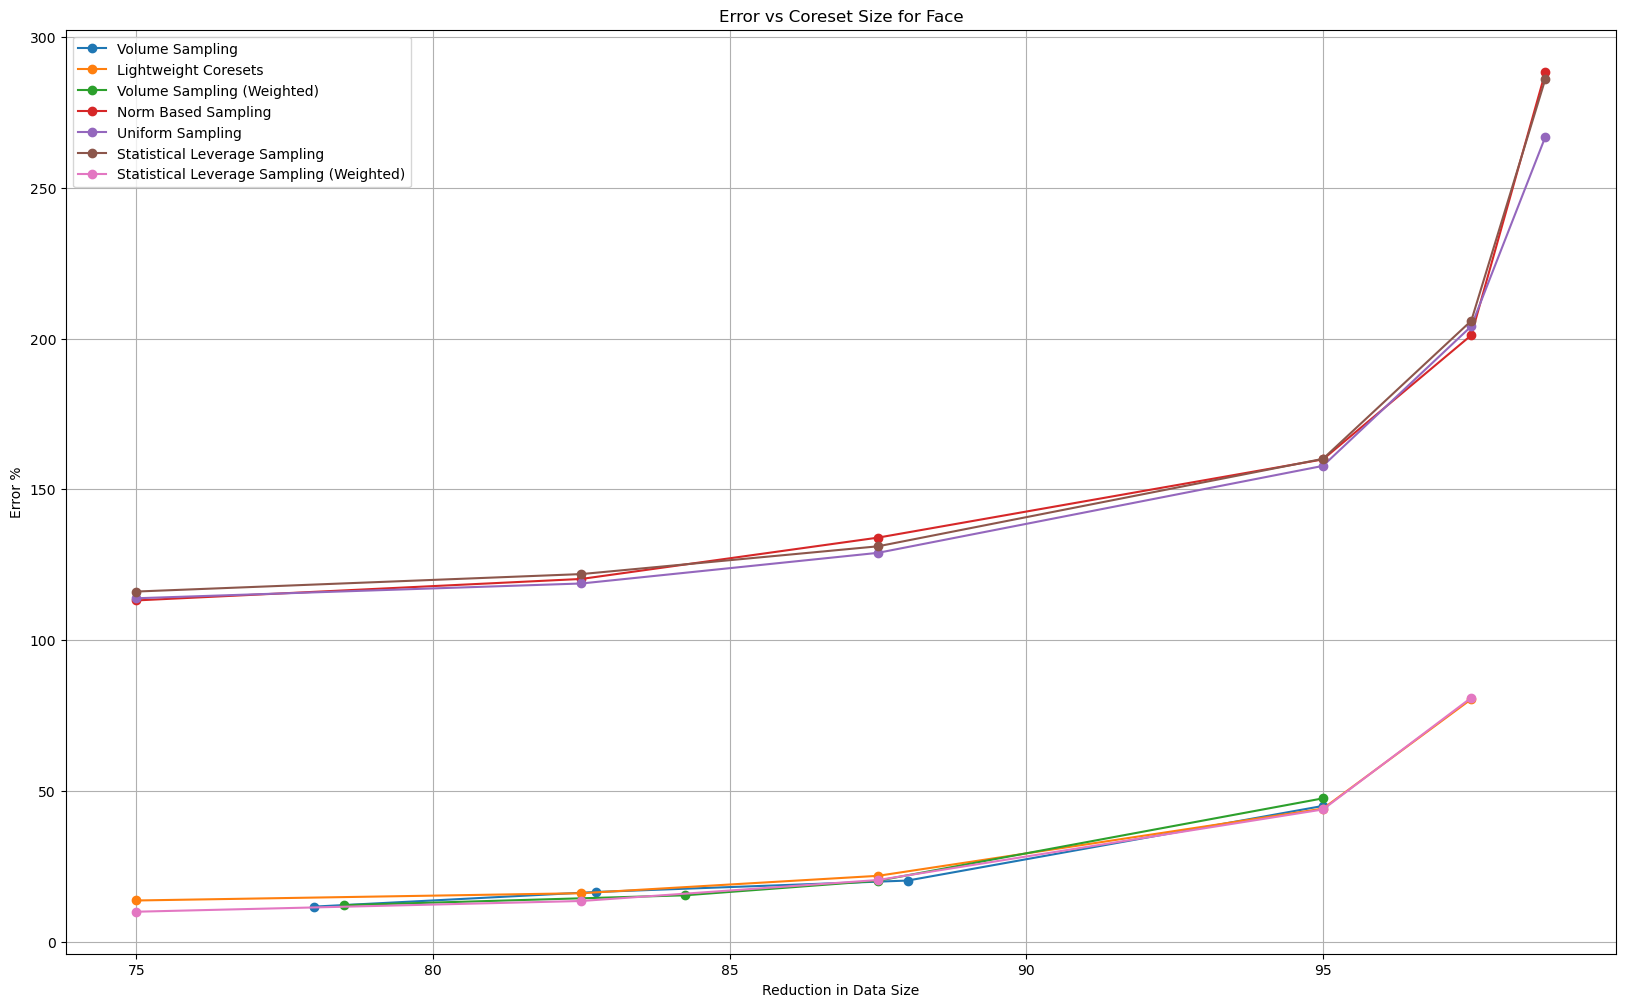

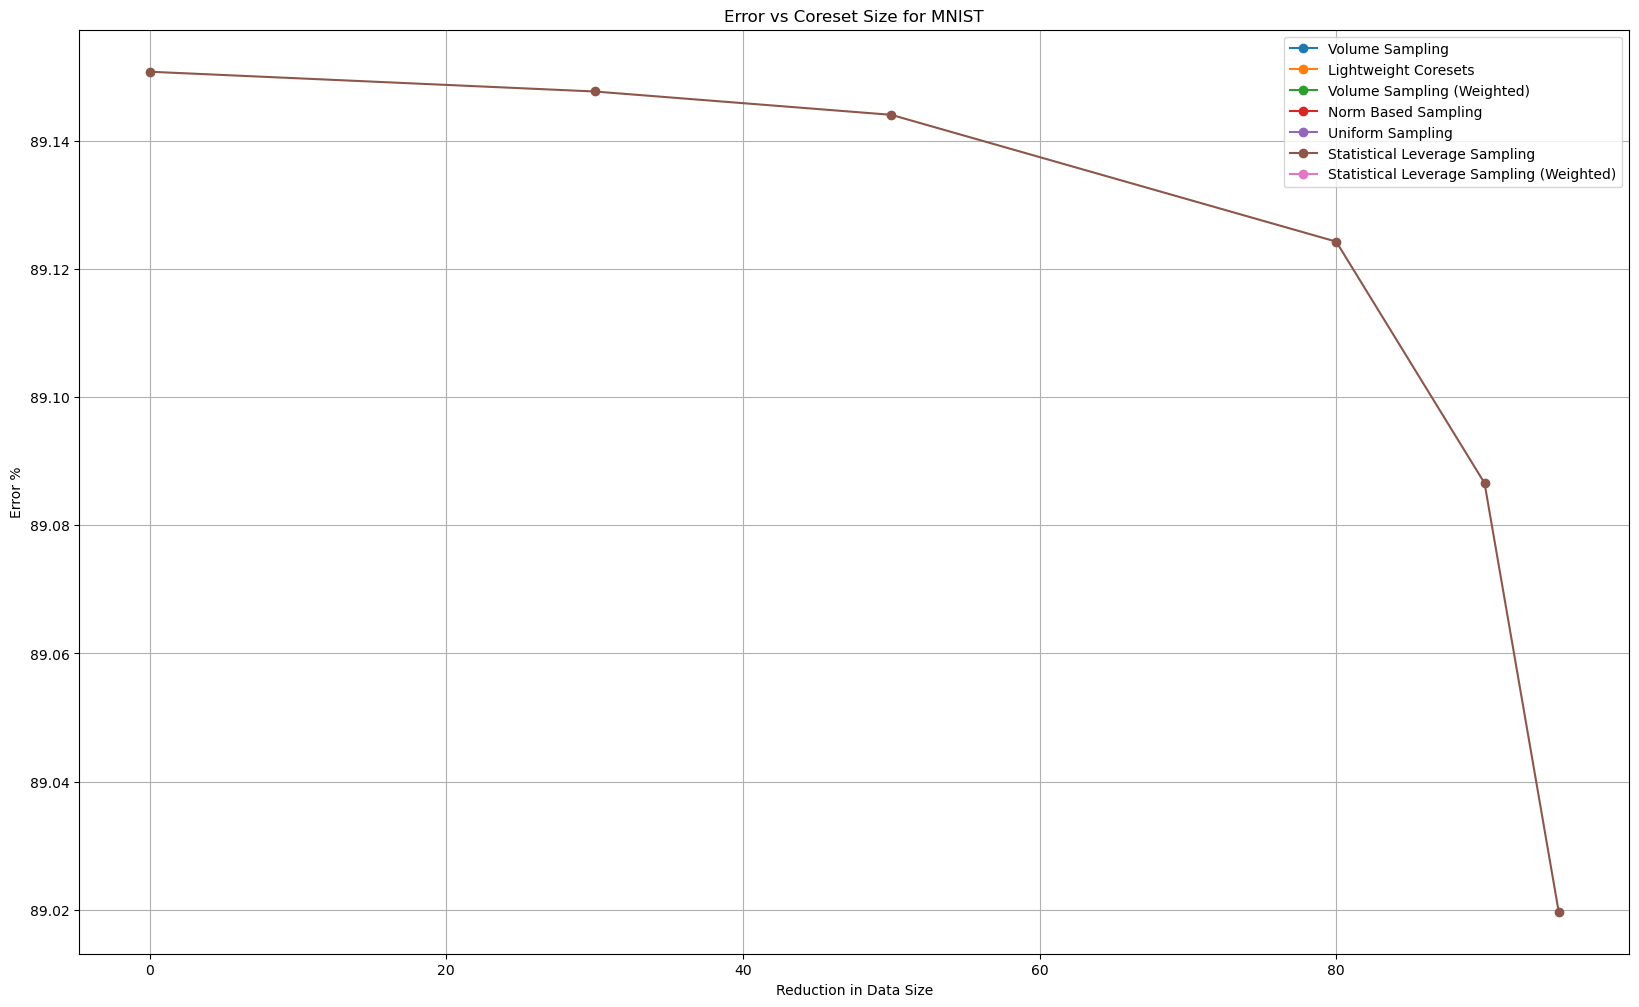

In [24]:
for data in df['Data'].unique():
    plt.figure(figsize=(20, 12))
    for sampling_type in df['Sampling Type'].unique():
        if sampling_type == 'Volume Sampling' or sampling_type == 'Volume Sampling (Weighted)':
            plt.plot(df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMeans++') & (df['Num Iterations Volume Sampling'] == 1)]['Reduction in Data Size'], df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMeans++') & (df['Num Iterations Volume Sampling'] == 1)]['Error'], marker='o', label=sampling_type)
            continue
        plt.plot(df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMeans++')]['Reduction in Data Size'], df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMeans++')]['Error'], marker='o', label=sampling_type)
    plt.xlabel('Reduction in Data Size')
    plt.ylabel('Error %')
    plt.title('Error vs Coreset Size for ' + data)
    plt.legend()
    plt.grid()
    plt.show()

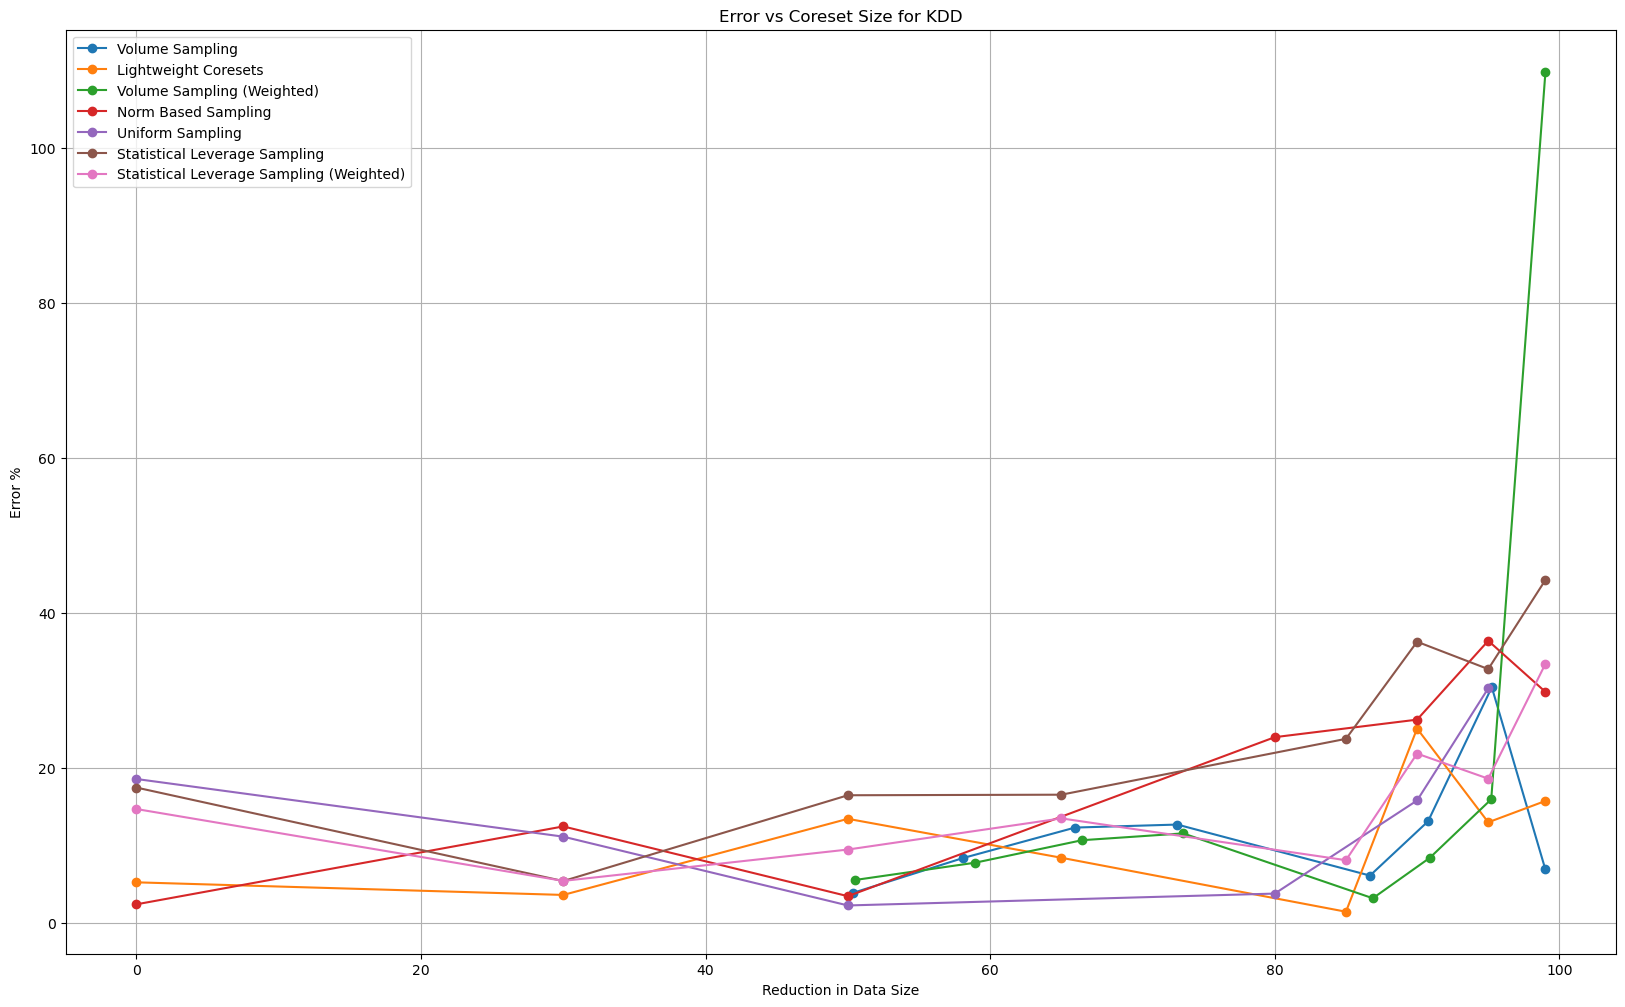

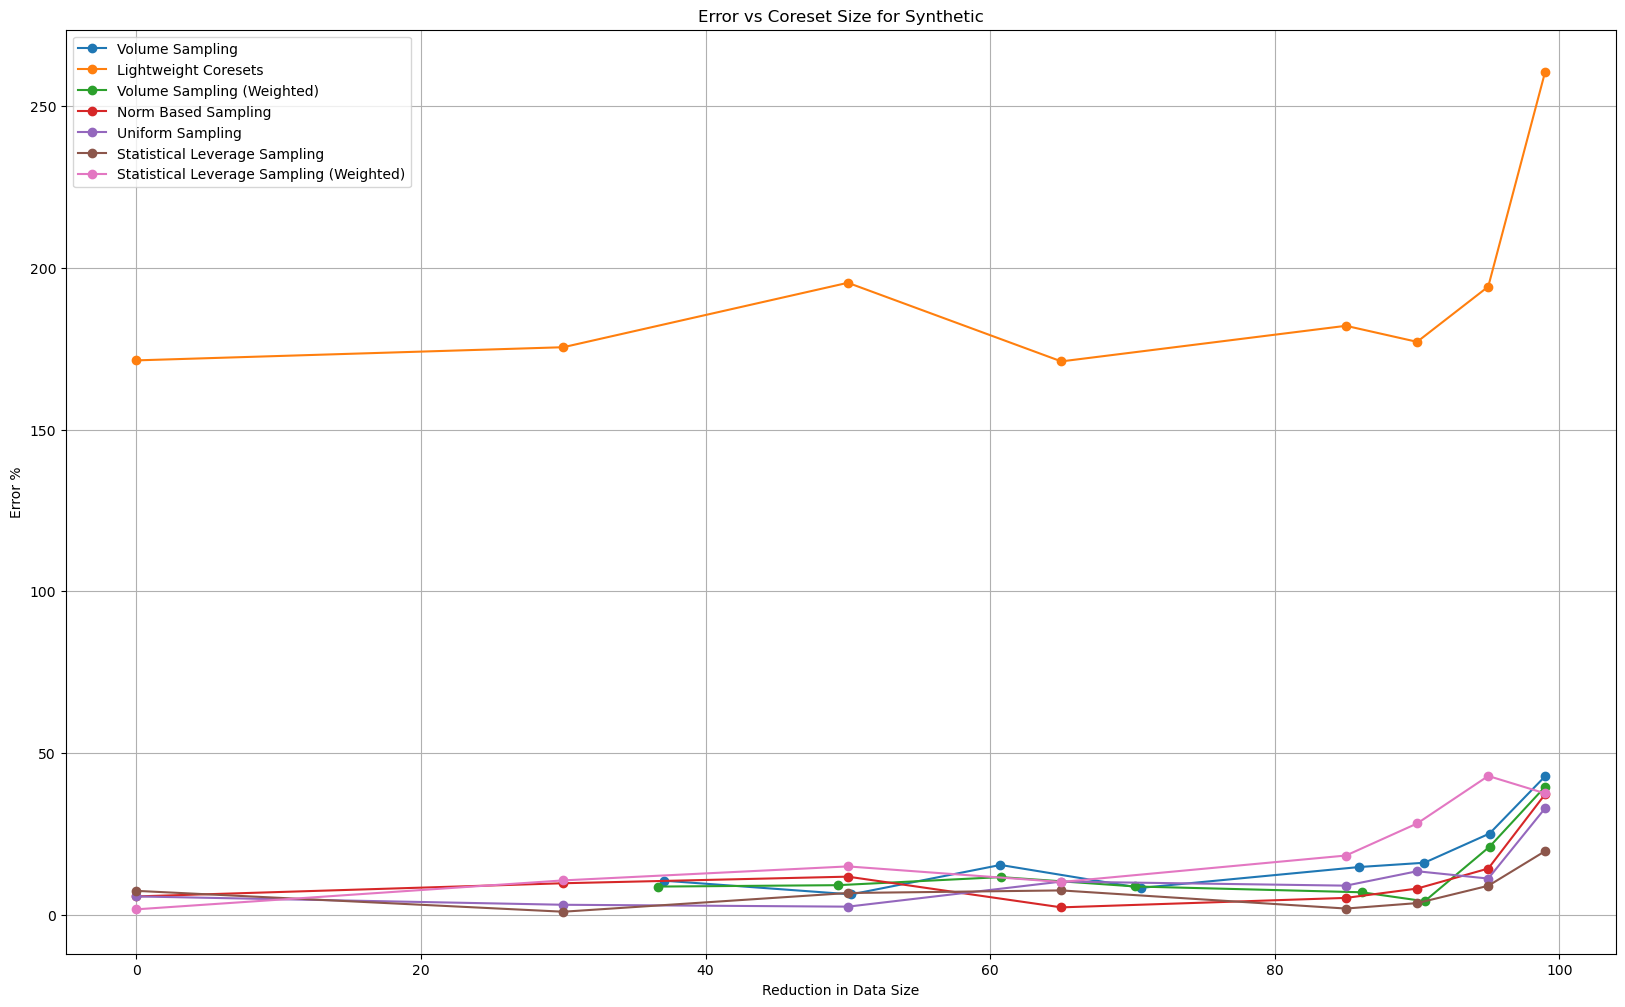

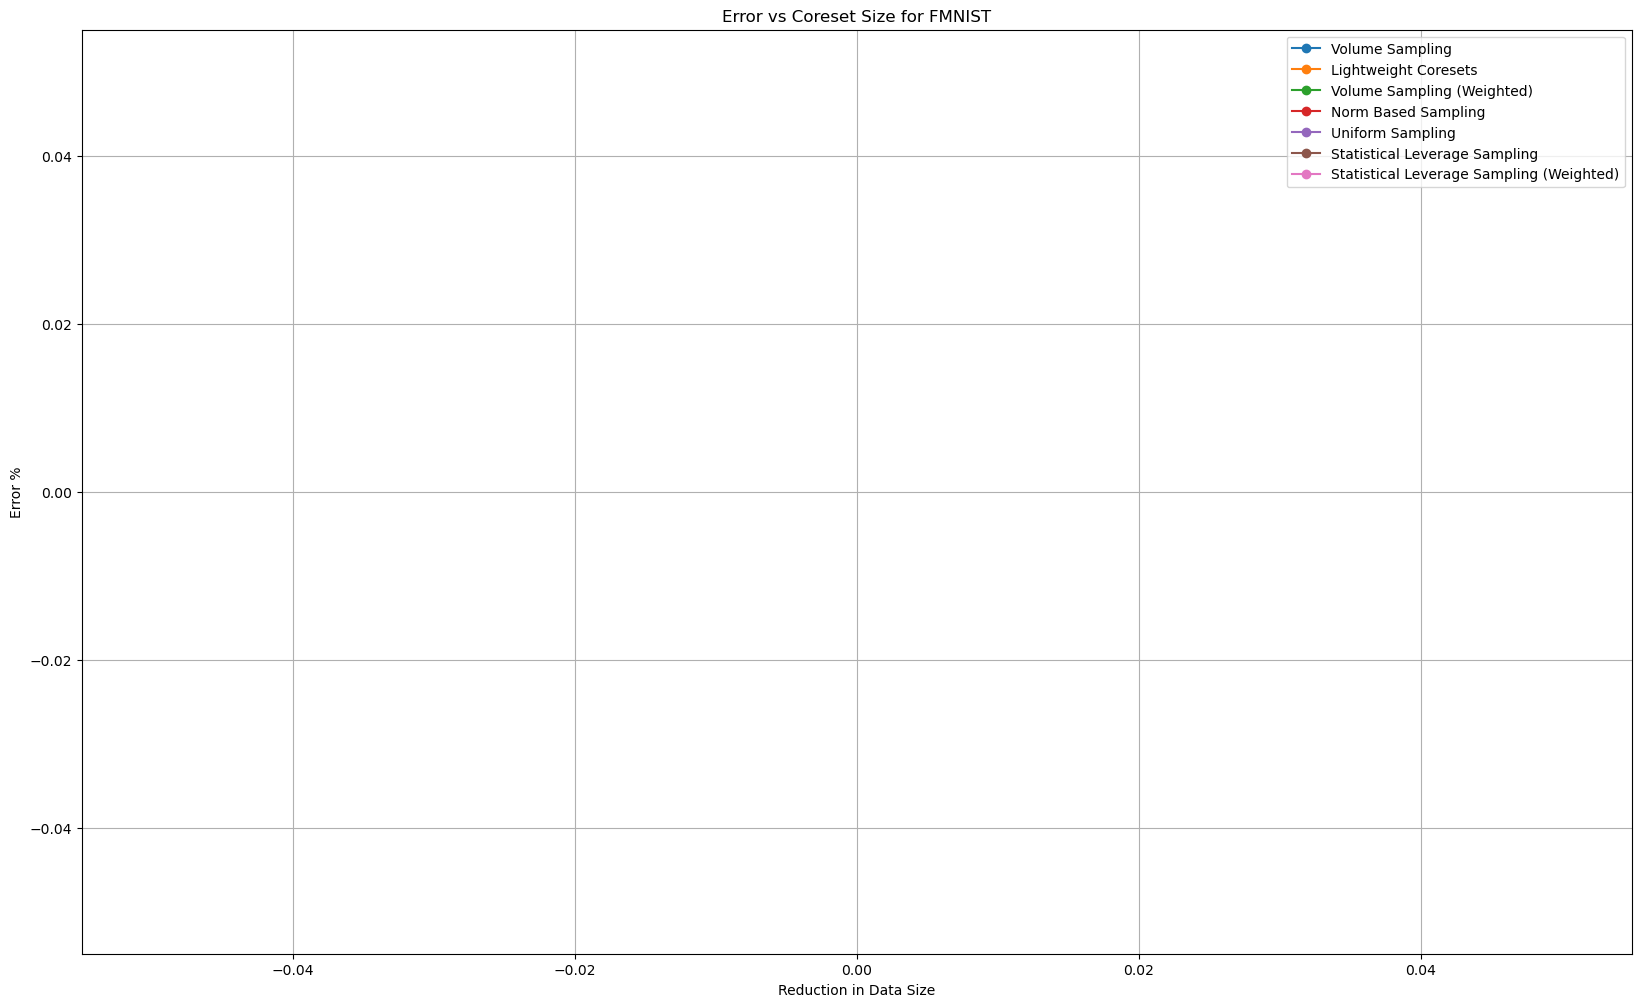

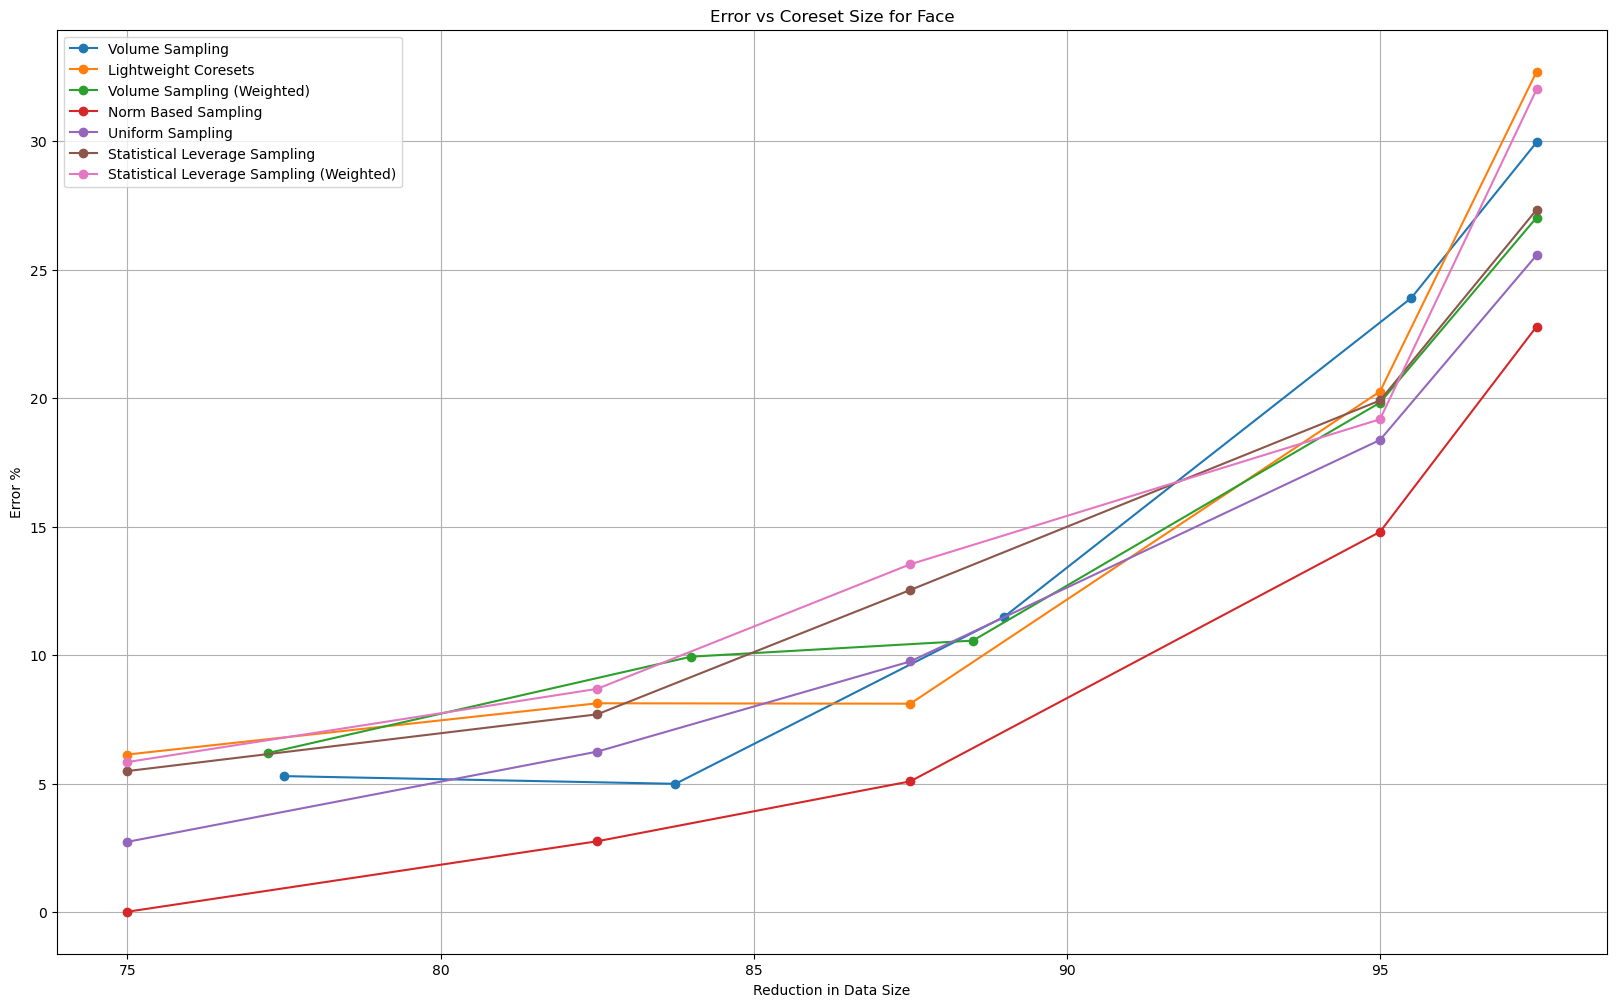

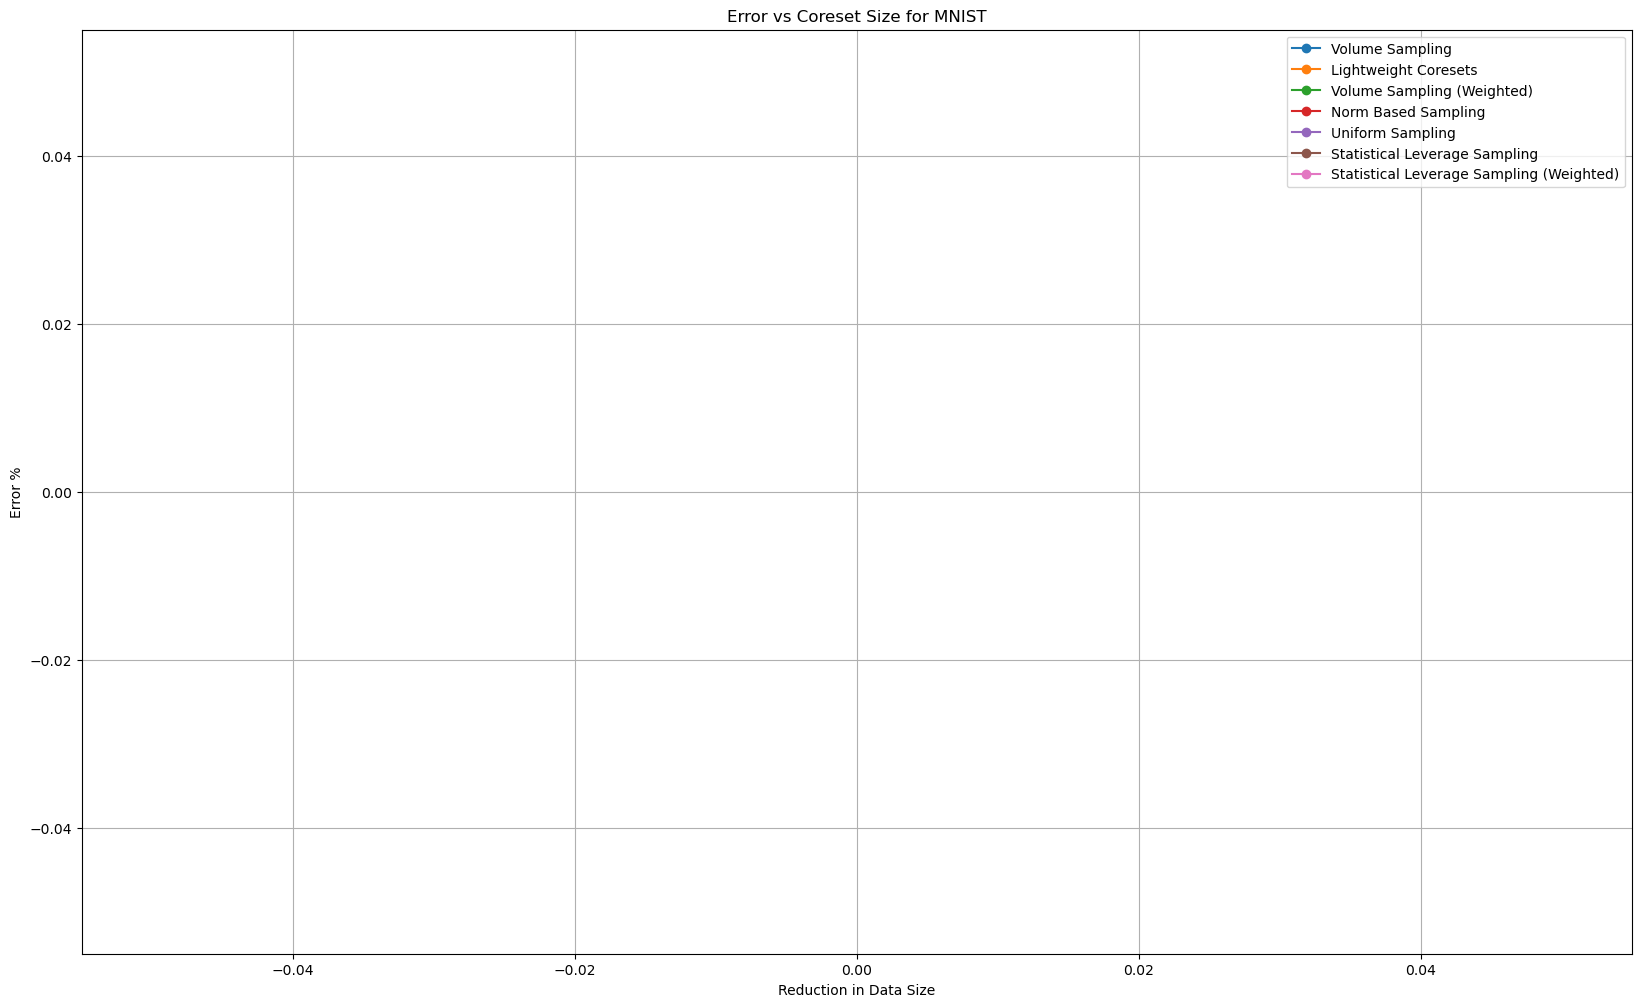

In [25]:
for data in df['Data'].unique():
    plt.figure(figsize=(20, 12))
    for sampling_type in df['Sampling Type'].unique():
        if sampling_type == 'Volume Sampling' or sampling_type == 'Volume Sampling (Weighted)':
            plt.plot(df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMedoids') & (df['Num Iterations Volume Sampling'] == 1)]['Reduction in Data Size'], df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMedoids') & (df['Num Iterations Volume Sampling'] == 1)]['Error'], marker='o', label=sampling_type)
            continue
        plt.plot(df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMedoids')]['Reduction in Data Size'], df[(df['Data'] == data) & (df['Sampling Type'] == sampling_type) & (df['Clustering Algorithm'] == 'KMedoids')]['Error'], marker='o', label=sampling_type)
    plt.xlabel('Reduction in Data Size')
    plt.ylabel('Error %')
    plt.title('Error vs Coreset Size for ' + data)
    plt.legend()
    plt.grid()
    plt.show()

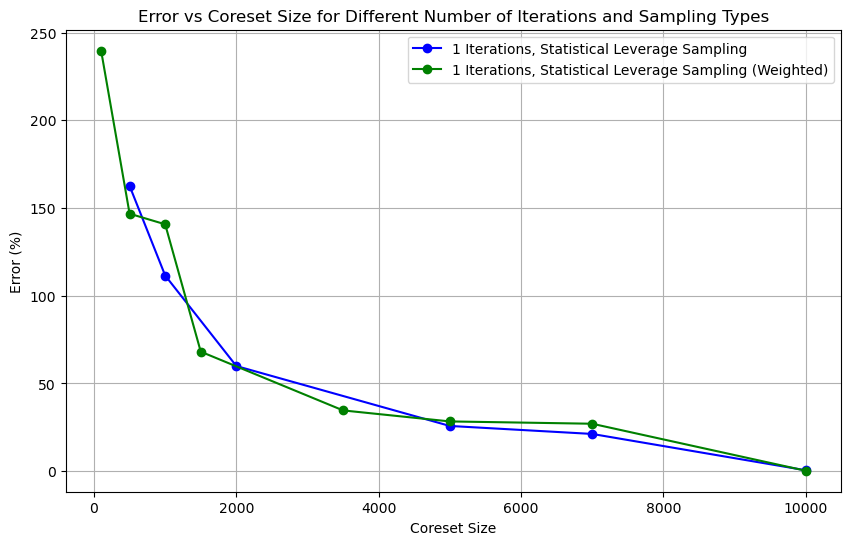

In [28]:

plt.figure(figsize=(10, 6))

i = 0
for data in df['Data'].unique():
    for algo in df['Clustering Algorithm'].unique():
        for sampling_type in ['Statistical Leverage Sampling', 'Statistical Leverage Sampling (Weighted)']: 
            filtered_data = df[(df['Sampling Type'] == sampling_type) & (df['Data'] == data) & (df['Clustering Algorithm'] == algo) ]
            plt.plot(filtered_data['Reduction in Data Size'], filtered_data['Error'], marker='o', linestyle='-', label=f'{1} Iterations, {sampling_type}')
            i+=1
        plt.title('Error vs Coreset Size for Different Number of Iterations and Sampling Types')
        plt.xlabel('CReduction in Data Size')
        plt.ylabel('Error (%)')
        plt.legend()
        plt.grid(True)
        plt.show()